In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pickle

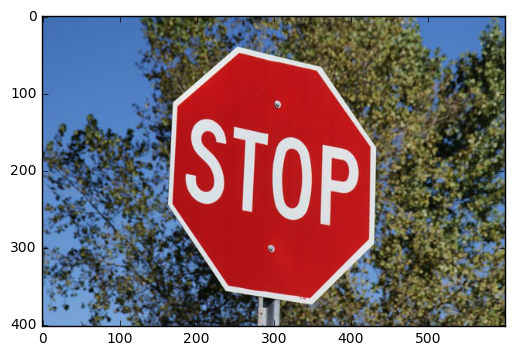

In [2]:
#read the stop sign image

img = mpimg.imread('images/stop2.jpg')
plt.imshow(img)


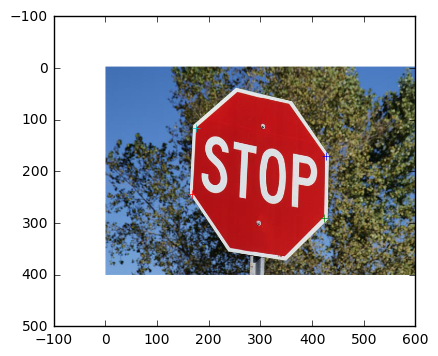

In [8]:
plt.imshow(img)
plt.plot(426,171,"+")
plt.plot(423,291,"+")
plt.plot(168,244,"+")
plt.plot(175,116,"+")


In [3]:
#Perspective transform function
def warp(img):
    
    img_size = (img.shape[1], img.shape[0])
    
    #define calibration box in source and destination coordinates
    #source coords
    src = np.float32([[426,171],[423,291],[168,244],[175,116]])
    #destination coords
    dst = np.float32([[422,132],[422,248],[171,248],[171,132]])
    
    #perform the transform, and get the perspective matrix M
    M = cv2.getPerspectiveTransform(src, dst)
    
    #get inverse by swapping the input params
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    #create a warped image using linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

In [4]:
warpedimg = warp(img)

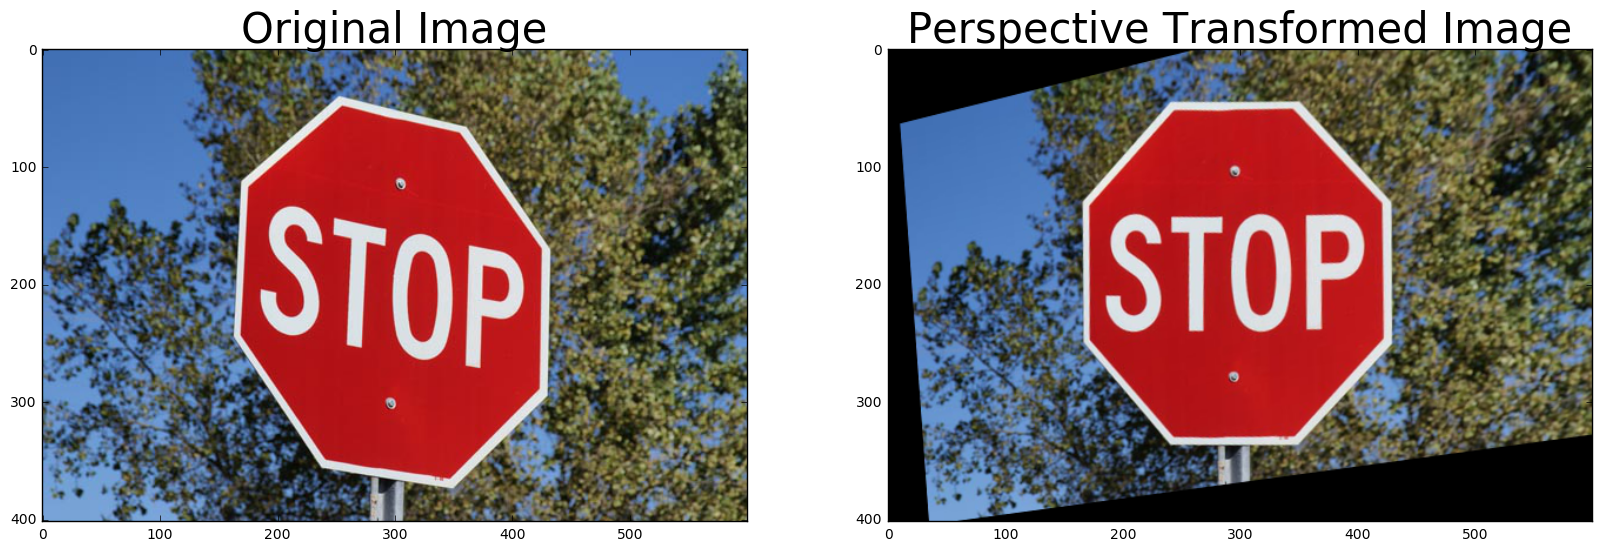

In [5]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warpedimg)
ax2.set_title('Perspective Transformed Image', fontsize=30)

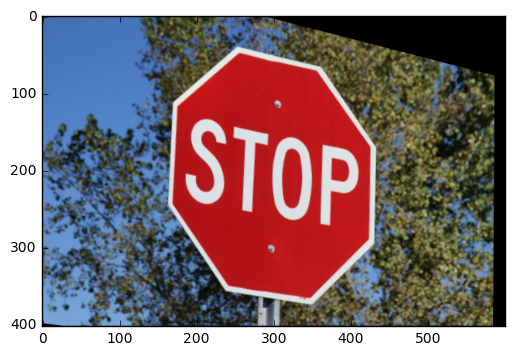

In [7]:
#unwarp
src = np.float32([[426,171],[423,291],[168,244],[175,116]])
dst = np.float32([[422,132],[422,248],[171,248],[171,132]])
     
Minv = cv2.getPerspectiveTransform(dst, src)
unwarp = cv2.warpPerspective(warpedimg, Minv, (img.shape[1], img.shape[0]))
plt.imshow(unwarp)